In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!ls data/Fresno/

 CO_PICKDATA_2014-12-31.csv	      PM25HR_PICKDATA_2015-12-31.csv
 CO_PICKDATA_2015-12-31.csv	      PM25HR_PICKDATA_2016-12-31.csv
 CO_PICKDATA_2016-12-31.csv	      SORAD_PICKDATA_2014-12-31.csv
 NOX_PICKDATA_2014-12-31.csv	      SORAD_PICKDATA_2015-12-31.csv
 NOX_PICKDATA_2015-12-31.csv	      SORAD_PICKDATA_2016-12-31.csv
 NOX_PICKDATA_2016-12-31.csv	      TEMP_PICKDATA_2014-12-31.csv
'OZONE_PICKDATA_2014-12-31 (1).csv'   TEMP_PICKDATA_2015-12-31.csv
 OZONE_PICKDATA_2015-12-31.csv	     'TEMP_PICKDATA_2016-12-31 (1).csv'
 OZONE_PICKDATA_2016-12-31.csv	      TEMP_PICKDATA_2016-12-31.csv
 PM10_LHR_PICKDATA_2014-12-31.csv     WINSPD_PICKDATA_2014-12-31.csv
 PM10_LHR_PICKDATA_2015-12-31.csv     WINSPD_PICKDATA_2015-12-31.csv
 PM10_LHR_PICKDATA_2016-12-31.csv     WINSPD_PICKDATA_2016-12-31.csv
 PM25HR_PICKDATA_2014-12-31.csv


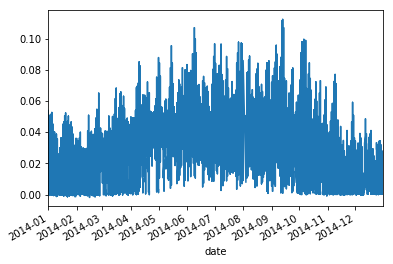

In [3]:
filename = 'data/Fresno/OZONE_PICKDATA_2014-12-31 (1).csv'
df1 = pd.read_csv(filename, parse_dates=[1])
df1.dropna(subset=['value'], inplace=True)
df1.date = pd.to_datetime(df1.date, format="%Y-%m-%d")
df1.index = df1.date
df1.sort_index(inplace=True)
df1.value.plot()

In [3]:
def read_file(filename):
    df = pd.read_csv(filename, parse_dates=[1])
    df.dropna(subset=['value'], inplace=True)
    df.date = pd.to_datetime(df.date, format="%Y-%m-%d")
    df.index = df.date
    df.sort_index(inplace=True)
    return df

,site,date,start_hour,value,variable,units,quality,prelim,name
date,,,,,,,,,
2015-01-01,3781,2015-01-01,0.0,0.0015,OZONE,Parts Per Million ( ppm ),NaN,NaN,Fresno-Garland
2015-01-01,3781,2015-01-01,1.0,0.0014,OZONE,Parts Per Million ( ppm ),NaN,NaN,Fresno-Garland
2015-01-01,3781,2015-01-01,2.0,0.0008,OZONE,Parts Per Million ( ppm ),NaN,NaN,Fresno-Garland
2015-01-01,3781,2015-01-01,3.0,0.0010,OZONE,Parts Per Million ( ppm ),NaN,NaN,Fresno-Garland
2015-01-01,3781,2015-01-01,5.0,0.0016,OZONE,Parts Per Million ( ppm ),NaN,NaN,Fresno-Garland


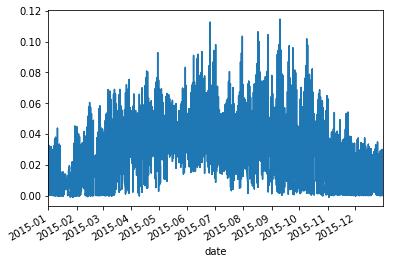

In [5]:
df2 = read_file('data/Fresno/OZONE_PICKDATA_2015-12-31.csv')
df2.value.plot()
df2.head()

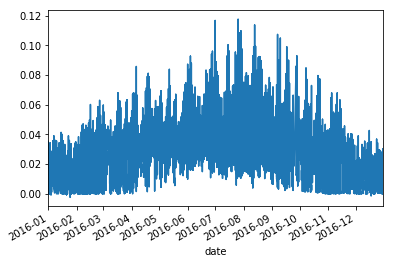

In [6]:
df3 = read_file('data/Fresno/OZONE_PICKDATA_2016-12-31.csv')
df3.value.plot()

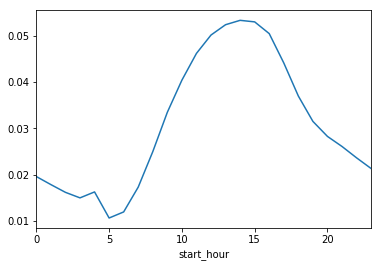

In [7]:
df_tot = pd.concat([df1, df2, df3])
hourly_mean = df_tot.groupby('start_hour').value.mean()
hourly_mean.plot()

count    23.000000
mean      0.013675
std       0.011296
min       0.003015
25%       0.005632
50%       0.006648
75%       0.022975
max       0.034525
Name: value, dtype: float64

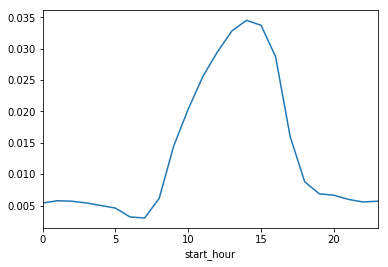

In [8]:
winter = df1.loc[ df1['date'].map( lambda x: x.month >= 12 or x.month < 3 ) ]
winter_hourly = winter.groupby('start_hour').value.mean()
winter_hourly.plot()
winter_hourly.describe()

In [8]:
def get_data_season(df_in, months):
    df = df_in.loc[ df_in['date'].map( lambda x: x.month in months )]
    return df

count    23.000000
mean      0.036310
std       0.014725
min       0.013614
25%       0.023180
50%       0.035520
75%       0.050856
max       0.056654
Name: value, dtype: float64

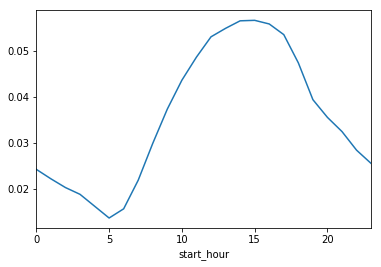

In [10]:
spring = get_data_season(df1, [3, 4, 5])
spring_hourly = spring.groupby('start_hour').value.mean()
spring_hourly.plot()
spring_hourly.describe()

count    23.000000
mean      0.046390
std       0.017986
min       0.014270
25%       0.030307
50%       0.048578
75%       0.064960
max       0.067330
Name: value, dtype: float64

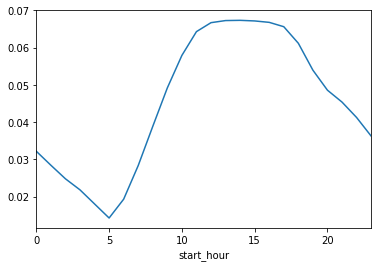

In [11]:
summer = get_data_season(df1, [6, 7, 8])
summer_hourly = summer.groupby('start_hour').value.mean()
summer_hourly.plot()
summer_hourly.describe()

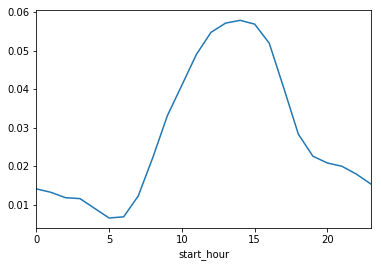

In [12]:
fall = get_data_season(df1, [9, 10, 11])
fall_hourly = fall.groupby('start_hour').value.mean()
fall_hourly.plot()

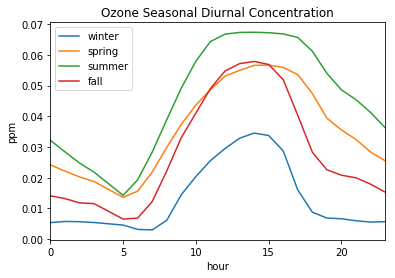

In [15]:
fig = plt.figure()

winter_hourly.plot()
spring_hourly.plot()
summer_hourly.plot()
fall_hourly.plot()
plt.legend(['winter', 'spring', 'summer', 'fall'])
plt.title("Ozone Seasonal Diurnal Concentration")
plt.ylabel("ppm")
plt.xlabel("hour")

fig.savefig("seasons_Ozone.svg")

In [7]:
df5 = pd.read_csv("data_merged_all_cleaned.csv", parse_dates=[0])
df5.index = df5.date
df5.head()

,date,ozone,wd,ws,pm10,pm25,temp,nox
date,,,,,,,,
2014-01-01 00:00:00,2014-01-01 00:00:00,0.0014,0.0,0.0,172.2,136.4,6.21,0.1685
2014-01-01 01:00:00,2014-01-01 01:00:00,0.0022,0.0,0.0,187.0,152.3,5.63,0.1753
2014-01-01 02:00:00,2014-01-01 02:00:00,0.0023,0.0,0.0,195.5,161.6,5.08,0.1599
2014-01-01 03:00:00,2014-01-01 03:00:00,0.0017,75.0,0.6,178.8,151.9,4.63,0.1439
2014-01-01 04:00:00,2014-01-01 04:00:00,NaN,0.0,0.0,140.3,121.4,4.36,NaN


In [12]:
df5['hour'] = df5.index.hour
df5.hour.describe()

count    80119.000000
mean        11.506472
std          6.932852
min          0.000000
25%          5.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

In [36]:
df_spring = get_data_season(df5, [3, 4, 5])
spring_hourly_pm10 = df_spring.groupby('hour').pm10.mean()
spring_hourly_pm25 = df_spring.groupby('hour').pm25.mean()

df_summer = get_data_season(df5, [6, 7, 8])
summer_hourly_pm10 = df_summer.groupby('hour').pm10.mean()
summer_hourly_pm25 = df_summer.groupby('hour').pm25.mean()

df_fall = get_data_season(df5, [9, 10, 11])
fall_hourly_pm10 = df_fall.groupby('hour').pm10.mean()
fall_hourly_pm25 = df_fall.groupby('hour').pm25.mean()

df_winter = get_data_season(df5, [0, 1, 2])
winter_hourly_pm10 = df_winter.groupby('hour').pm10.mean()
winter_hourly_pm25 = df_winter.groupby('hour').pm25.mean()

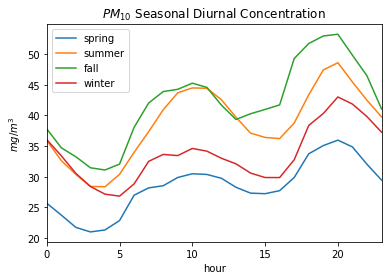

In [39]:
fig = plt.figure()

spring_hourly_pm10.plot()
summer_hourly_pm10.plot()
fall_hourly_pm10.plot()
winter_hourly_pm10.plot()

plt.legend(['spring', 'summer', 'fall', 'winter'])
plt.title("$PM_{10}$ Seasonal Diurnal Concentration")
plt.ylabel("$mg/m^3$")
plt.xlabel("hour")

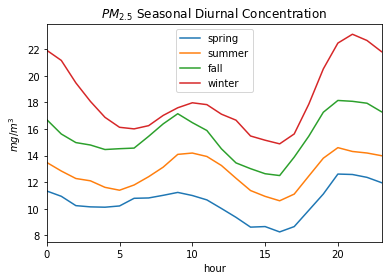

In [38]:
fig = plt.figure()

spring_hourly_pm25.plot()
summer_hourly_pm25.plot()
fall_hourly_pm25.plot()
winter_hourly_pm25.plot()

plt.legend(['spring', 'summer', 'fall', 'winter'])
plt.title("$PM_{2.5}$ Seasonal Diurnal Concentration")
plt.ylabel("$mg/m^3$")
plt.xlabel("hour")